In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Thesis_Simulation/Big eta/No connection

Mounted at /content/gdrive
/content/gdrive/MyDrive/Thesis_Simulation/Big eta/No connection


In [3]:
rounds = 50
vehicle_limit = 80
all_routes = [[0, 1], [2, 3]]

In [4]:
record = pd.read_csv(f'Saved_data/Simulation_records/Round_{rounds}.csv')
utility = pd.read_csv(f'Saved_data/Utility_data/Round_{rounds}.csv')

In [5]:
record

Vehicle_label Road_order  Total_time Leading_vehicles Stopped_time  \
0                 0     [2, 3]       67.75     [-999, -999]       [0, 0]   
1                 1     [2, 3]       70.85           [0, 0]       [0, 0]   
2                 2     [0, 1]       67.40     [-999, -999]       [0, 0]   
3                 3     [0, 1]       70.10           [2, 2]       [0, 0]   
4                 4     [2, 3]       72.70           [1, 1]       [0, 0]   
...             ...        ...         ...              ...          ...   
3995             75     [0, 1]      118.45         [74, 74]       [0, 0]   
3996             76     [0, 1]      119.50         [75, 75]       [0, 0]   
3997             77     [0, 1]      120.45         [76, 76]       [0, 0]   
3998             78     [0, 1]      121.45         [77, 77]       [0, 0]   
3999             79     [0, 1]      122.45         [78, 78]       [0, 0]   

     Stop_while_front  Round_number  
0              [0, 0]             1  
1              [0, 0]             1  
2              [0, 0]             1  
3              [0, 0]             1  
4              [0, 0]             1  
...               ...           ...  
3995           [0, 0]            50  
3996           [0, 0]            50  
3997           [0, 0]            50  
3998           [0, 0]            50  
3999           [0, 0]            50  

[4000 rows x 7 columns]

In [6]:
record['Road_order'] = record.apply(lambda row: ast.literal_eval(row['Road_order']), axis=1)
record["Road_order_label"] = record.apply(lambda row: all_routes.index(row.Road_order), axis=1)

In [7]:
# time_df = pd.DataFrame(utility['Routes_taken'].to_list(), columns=range(rounds))
# print(route_df.shape)
# display(route_df.head(10))

In [8]:
time_df = pd.pivot_table(record, values='Total_time', 
                         index=['Road_order_label', 'Round_number'], 
                         aggfunc=np.mean).reset_index(drop=False)
# time_df.loc[time_df.Road_order_label==1].sort_values('Round_number').Total_time.values

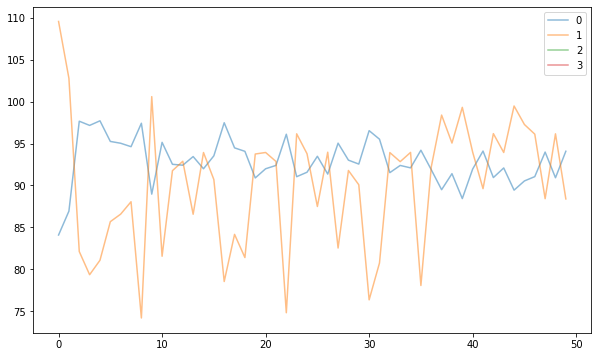

In [9]:
# Changes in average time needed to go through each route over time
plot_route_time = [[], [], [], []]

for i in range(2):
    times = time_df.loc[time_df.Road_order_label==i].sort_values('Round_number').Total_time.values
    plot_route_time[i]=times
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_route_time[i], label=str(i), alpha=0.5)
    
plt.legend()

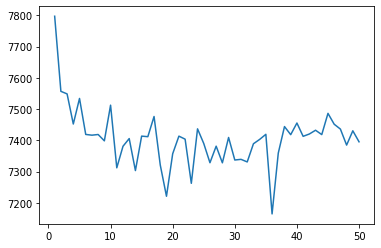

In [10]:
time_df2 = pd.pivot_table(record, values='Total_time', index='Round_number', aggfunc=np.sum).reset_index(drop=False)
plt.plot(time_df2.Round_number, time_df2.Total_time)

In [11]:
time_df2.Total_time.mean()

7406.685999999753

In [12]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# prob_df = pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))
# print(prob_df.shape)
# display(prob_df.head(10))

In [13]:
len(utility.Routes_taken[0])

150

In [14]:
utility['Routes_taken'] = utility.apply(lambda row: ast.literal_eval(row['Routes_taken']), axis=1)
route_df = pd.DataFrame(utility['Routes_taken'].to_list(), columns=range(rounds))
print(route_df.shape)
display(route_df.head(10))

(80, 50)


0   1   2   3   4   5   6   7   8   9   ...  40  41  42  43  44  45  46  \
0   1   0   1   0   0   1   1   1   1   1  ...   1   1   0   0   1   1   1   
1   1   0   1   1   0   0   1   0   0   0  ...   0   1   0   0   1   1   1   
2   0   1   0   0   0   1   1   1   0   1  ...   1   1   0   1   1   1   1   
3   0   1   1   0   0   1   1   1   1   0  ...   0   0   0   1   1   0   0   
4   1   0   1   1   0   1   1   0   0   0  ...   1   1   0   0   0   1   0   
5   1   0   0   0   1   1   0   0   0   1  ...   1   0   0   0   0   0   0   
6   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
7   1   0   0   0   0   0   1   0   0   1  ...   0   0   1   1   1   0   0   
8   1   0   0   0   1   0   0   1   0   1  ...   0   1   1   0   1   0   0   
9   1   0   1   0   1   1   1   0   0   1  ...   0   1   1   0   1   0   1   

   47  48  49  
0   0   1   1  
1   0   1   0  
2   0   1   1  
3   1   1   1  
4   0   1   1  
5   0   0   1  
6   0   0   0  
7   0   0   0  
8   0   1   1  
9   0   1   1  

[10 rows x 50 columns]

In [15]:
# for r in range(1, rounds+1):
#     df = pd.read_csv(f'Saved_SM/Utility_data/Round_{r}.csv')
#     df['Routes_taken'] = df.apply(lambda row: ast.literal_eval(row['Routes_taken'])[1:], axis=1)
#     df.to_csv(f'Saved_SM/Utility_data/Round_{r}.csv')

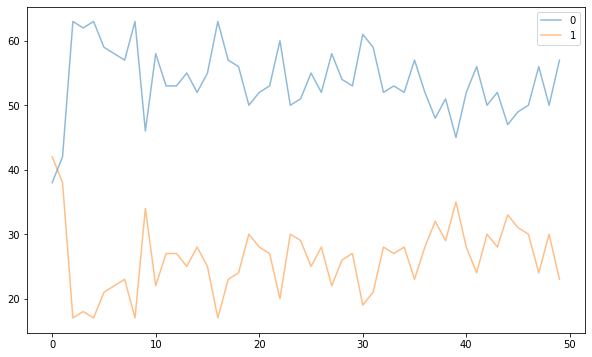

In [16]:
# Changes in number of vehicles that took the route over time
plot_route_l = [[], [], [], []]

for i in range(2):
    for j in range(rounds):
        plot_route_l[i].append(len(route_df.loc[route_df[j]==i]))
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(2):
    ax.plot(plot_route_l[i], label=str(i), alpha=0.5)
    
plt.legend()

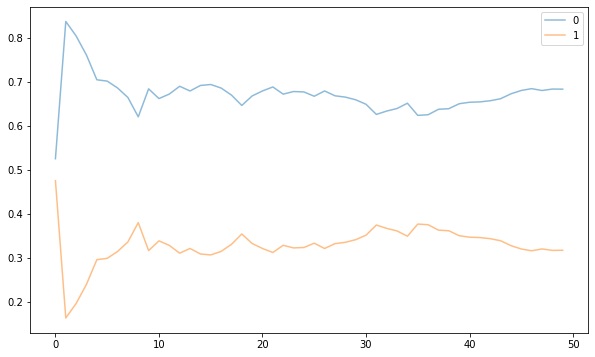

In [17]:
# Changes in vehicles' probabilities of selecting each route over time
plot_prob_l = [[], [], [], []]

for r in range(1, rounds+1):
    df = pd.read_csv(f'Saved_data/Utility_data/Round_{r}.csv')
    df['Probabilities'] = df.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
    for i in range(2):
        avg_prob = pd.DataFrame(df['Probabilities'].to_list(), columns=range(2))[i].mean()
        plot_prob_l[i].append(avg_prob)
        
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(2):
    ax.plot(plot_prob_l[i], label=str(i), alpha=0.5)
    
plt.legend()

In [18]:
utility

Vehicle_label                                   Utilities  \
0               0    [-41.39933687590318, -41.52165907793804]   
1               1   [-6.9909993877496275, -7.009906371216307]   
2               2  [-18.747028568945048, -18.845579665216228]   
3               3  [-14.514243088762594, -14.632500392294144]   
4               4   [-3.0279891707835014, -3.034879562859847]   
..            ...                                         ...   
75             75    [-56.91721348621387, -57.46505306535902]   
76             76   [-99.13752936373471, -116.13011192593424]   
77             77    [-38.35485972656354, -39.11389119616214]   
78             78   [-36.15629383731257, -35.485229698398186]   
79             79    [-6.674511322183675, -6.605011505262265]   

                                   Probabilities  \
0       [0.5305424767889557, 0.4694575232110442]   
1       [0.5047266050642979, 0.4952733949357021]   
2       [0.5246178525900488, 0.4753821474099512]   
3      [0.5295299197579799, 0.47047008024202014]   
4         [0.501722591203731, 0.498277408796269]   
..                                           ...   
75      [0.6336342117605517, 0.3663657882394482]   
76  [0.9999999582924056, 4.1707594438048576e-08]   
77     [0.6811434184315068, 0.31885658156849317]   
78      [0.3382586032579467, 0.6617413967420532]   
79     [0.48263203613737193, 0.5173679638626281]   

                                         Routes_taken     Gamma       Eta  
0   [1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...  4.870339  1.545504  
1   [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...  5.641079  1.052061  
2   [0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, ...  5.277952  1.336720  
3   [0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, ...  6.026209  1.257261  
4   [1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, ...  4.713734  0.744616  
..                                                ...       ...       ...  
75  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  5.263564  1.537167  
76  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  5.388814  1.647043  
77  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  4.759034  1.461882  
78  [0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, ...  4.816625  1.446830  
79  [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, ...  4.708682  1.016671  

[80 rows x 6 columns]

In [19]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(df['Probabilities'].to_list(), columns=range(4))[i].mean()

In [20]:
plot_eta_prob = [[], [], [], []]

utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

for i in range(2):
    plot_eta_prob[i]=pd.DataFrame(utility['Probabilities'].to_list(), columns=range(2))[i].values

In [21]:
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

In [22]:
# len(utility.Eta.values), len(plot_eta_prob[1])

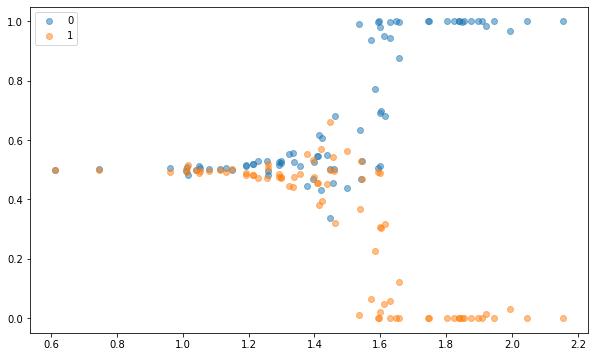

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(2):
    ax.scatter(utility.Eta.values, plot_eta_prob[i], label=str(i), alpha=0.5)
    
plt.legend()

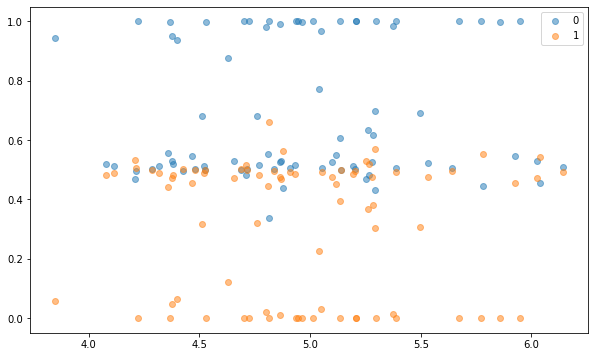

In [24]:
plot_gamma_prob = plot_eta_prob

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(2):
    ax.scatter(utility.Gamma.values, plot_gamma_prob[i], label=str(i), alpha=0.5)
    
plt.legend()